In [413]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)

In [414]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [415]:
df_test_anomaly = pd.read_csv(f"{path_dataframes}/df_test_anomaly.csv",index_col="index")
df_train = pd.read_csv(f"{path_dataframes}/df_train.csv",index_col="index")

df_labels_anomaly = pd.read_csv(f"{path_dataframes}/df_anomaly_labels.csv",index_col="index")

# df_train_anomaly.index = df_train_anomaly["Unnamed: 0"]
df_test_anomaly=df_test_anomaly.drop(columns=["pred"])



In [416]:
df_test_anomaly

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,164.065211,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,164.860582,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972


In [417]:
df_test_anomaly

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,164.065211,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,164.860582,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972


In [418]:
df_labels_anomaly

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
index,,,,,,,,,,,,,,,,
105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1


In [419]:
df_features = pd.concat([df_test_anomaly],axis=0)

In [420]:
df_features

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,164.065211,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,164.860582,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972


In [421]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_features)

df_features['Cluster'] = kmeans.labels_

/Users/alexdediu/anaconda3/envs/pytorch-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [422]:
df_features['Cluster'].values

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1], dtype=int32)

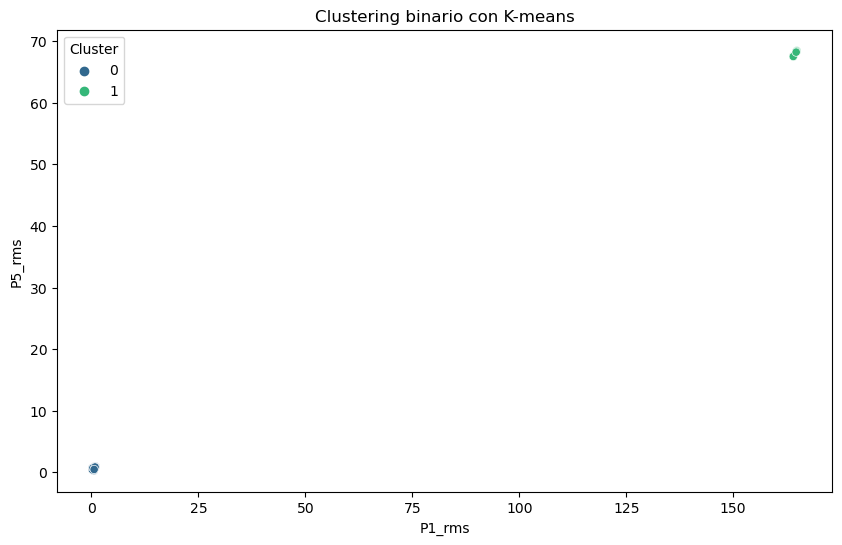

In [423]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P1_rms', y='P5_rms', hue='Cluster', data=df_features, palette='viridis')
plt.title('Clustering binario con K-means')
plt.show()


In [424]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_features, kmeans.labels_)
print(f'Coefficiente di silhouette: {score}')

Coefficiente di silhouette: 0.9940536192189978


In [425]:
df_test_anomaly

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,164.065211,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,164.860582,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972


In [426]:
df_features

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,...,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile,Cluster
index,,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,...,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748,0
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,...,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881,0
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,...,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822,0
184,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,...,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636,1
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,...,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762,0
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,...,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896,0
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,...,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207,0
192,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,...,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197,1
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,...,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972,0


In [427]:
df_known = df_features.loc[df_features['Cluster'].isin([0])]


In [428]:
df_known = df_known.drop(columns="Cluster")

In [429]:
df_known

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
196,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031
197,0.405805,0.263327,0.649340,0.793566,0.813214,0.693373,0.584838,0.419350,0.586832,0.621794,0.253273,0.183778,0.545799,0.436139,0.036974,0.467494,0.209820,0.025448,0.234216,0.098853


In [430]:
df_train = df_train[105:]

In [431]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels_anomaly["Condition"], test_size=0.33, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[18  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [432]:
y_pred_values = random_forest.predict(df_known)
y_pred_values

array([3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [433]:
idx= np.array(y_pred_values)

i_anomaly = np.where(idx == 3)[0]
i_fault=np.where(idx == 2)[0]


In [434]:
df_anomaly_test = df_known.iloc[i_anomaly]
df_fault_test = df_known.iloc[i_fault]

In [435]:
df_known

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
178,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
186,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
188,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
193,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
196,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031
197,0.405805,0.263327,0.649340,0.793566,0.813214,0.693373,0.584838,0.419350,0.586832,0.621794,0.253273,0.183778,0.545799,0.436139,0.036974,0.467494,0.209820,0.025448,0.234216,0.098853


In [436]:
df_anomaly_test.to_csv(f"{path_dataframes}/df_test_bubble.csv")
df_fault_test.to_csv(f"{path_dataframes}/df_test_sv.csv")


In [439]:
df_fault_test

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
index,,,,,,,,,,,,,,,,,,,,
179,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
181,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
190,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
202,0.167160,0.339856,0.812565,0.870523,0.883807,0.016741,0.990733,0.009720,0.906205,0.917463,0.785012,0.449199,0.748350,0.858009,0.811091,0.872061,0.157568,0.013006,0.480677,0.392654
205,0.165093,0.331766,0.876174,0.908170,0.917917,-0.007509,1.002227,0.003162,0.921515,0.931058,0.837375,0.433291,0.741739,0.867685,0.778800,0.880899,0.157479,0.012307,0.457243,0.231810
211,0.159077,0.329359,0.889466,0.916846,0.925739,0.000314,1.001944,0.003408,0.925780,0.934836,0.811674,0.433105,0.745907,0.836292,0.775557,0.852160,0.160581,0.012957,0.458831,0.284059
212,0.174721,0.347295,0.816773,0.893796,0.904926,0.016760,1.030072,0.002906,0.921096,0.930687,0.880597,0.440190,0.707148,0.857201,0.741910,0.871323,0.149474,0.012710,0.451124,0.124611
214,0.250613,0.325654,0.824912,0.866553,0.880194,0.079759,0.878126,0.086240,0.874428,0.889088,0.685379,0.433933,0.759952,0.824476,0.659197,0.841293,0.177092,0.013212,0.421845,0.228352
220,0.162941,0.328731,0.861372,0.905859,0.915830,0.002774,0.992679,0.003270,0.918470,0.928358,0.838425,0.428439,0.747336,0.863441,0.833745,0.877025,0.158852,0.013035,0.460249,0.245187
